1.1.1
0.9.6


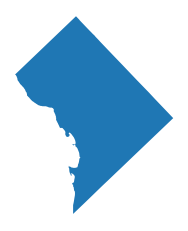

In [43]:
import folium
import openrouteservice as ors

%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps


import pandas as pd
import osmnx as ox
city = ox.geocode_to_gdf('Washington, D.C.')
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')


import geopandas as gpd
from shapely.geometry import Point, Polygon
import pandas as pd

import networkx as nx

import igraph as ig
print(ox.__version__)
print(ig.__version__)

weight = "length"


import numpy
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform 


In [44]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
my_map = gpd.read_file('Snow_Removal_Areas.kml', driver='KML')
my_map

,Name,Description,geometry
0,,,"POLYGON ((-77.00884 38.95484, -77.00866 38.954..."
1,,,"POLYGON ((-76.98949 38.94730, -76.98932 38.947..."
2,,,"POLYGON ((-77.00868 38.94796, -77.00870 38.948..."
3,,,"POLYGON ((-77.00595 38.95549, -77.00611 38.955..."
4,,,"POLYGON ((-76.98145 38.94078, -76.98165 38.940..."
...,...,...,...
77,,,"POLYGON ((-77.02132 38.94811, -77.02107 38.948..."
78,,,"POLYGON ((-77.02270 38.94625, -77.02283 38.946..."
79,,,"POLYGON ((-77.03779 38.93769, -77.03771 38.937..."
80,,,"POLYGON ((-76.98398 38.87971, -76.98427 38.879..."


In [45]:
coords = my_map.iloc[0]
finalcoords = coords[2]

G1 = ox.graph_from_polygon(finalcoords, network_type="drive",
                            simplify=True, retain_all=True, truncate_by_edge=True, 
                            clean_periphery=True, custom_filter=None)

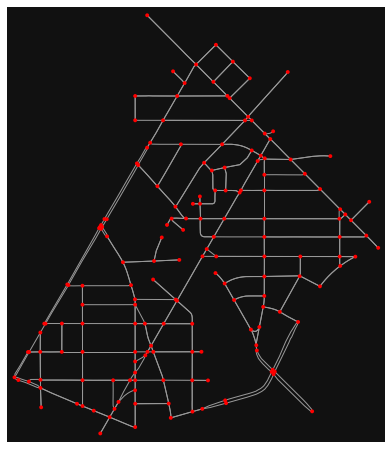

In [46]:
fig, ax = ox.plot_graph(G1, node_color="r")

In [47]:
G1.nodes[49226047].get('street_count')

3

In [48]:
nodes, edges = ox.graph_to_gdfs(G1)

In [49]:
edges.head()

osmid  \
u        v          key                         
49226047 647098998  0    [583912538, 5977894]   
49277063 49277064   0                 5979644   
         49782669   0                 5989589   
49277064 4135067936 0                 5979644   
         49277063   0                 5979644   

                                                                 name  \
u        v          key                                                 
49226047 647098998  0    [Sligo Mill Road, Sligo Mill Road Northeast]   
49277063 49277064   0                             Westmoreland Avenue   
         49782669   0                                      5th Avenue   
49277064 4135067936 0                             Westmoreland Avenue   
         49277063   0                             Westmoreland Avenue   

                             highway  oneway   length  \
u        v          key                                 
49226047 647098998  0    residential   False  251.466   
49277063 49277064   0    residential   False   99.911   
         49782669   0    residential   False  119.174   
49277064 4135067936 0    residential   False  100.458   
         49277063   0    residential   False   99.911   

                                                                  geometry  \
u        v          key                                                      
49226047 647098998  0    LINESTRING (-77.00163 38.96825, -77.00173 38.9...   
49277063 49277064   0    LINESTRING (-77.00347 38.96801, -77.00429 38.9...   
         49782669   0    LINESTRING (-77.00347 38.96801, -77.00445 38.9...   
49277064 4135067936 0    LINESTRING (-77.00429 38.96864, -77.00512 38.9...   
         49277063   0    LINESTRING (-77.00429 38.96864, -77.00347 38.9...   

                        lanes bridge  
u        v          key               
49226047 647098998  0     NaN    NaN  
49277063 49277064   0     NaN    NaN  
         49782669   0     NaN    NaN  
49277064 4135067936 0     NaN    NaN  
         49277063   0     NaN    NaN

In [56]:
totalEdges = pd.DataFrame()

In [57]:
totalEdges = edges['lanes']

In [58]:
totalEdges.head()

u         v           key
49226047  647098998   0      NaN
49277063  49277064    0      NaN
          49782669    0      NaN
49277064  4135067936  0      NaN
          49277063    0      NaN
Name: lanes, dtype: object

In [59]:
EdgesWithInfox = totalEdges.dropna()

In [60]:
len(totalEdges)

432

In [61]:
len(EdgesWithInfox)

191

In [62]:
edges['highway']

u           v           key
49226047    647098998   0      residential
49277063    49277064    0      residential
            49782669    0      residential
49277064    4135067936  0      residential
            49277063    0      residential
                                  ...     
8825268120  8825268119  0        secondary
            49812437    0         tertiary
8825268121  49781334    0      residential
            5354789679  0         tertiary
9068829825  3366676344  0          primary
Name: highway, Length: 432, dtype: object